In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

import sklearn
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.datasets import fetch_openml

X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [6]:
ind72 = np.argwhere((Y == '7') | (Y == '2'))
ind72

array([[    5],
       [   15],
       [   16],
       ...,
       [69985],
       [69990],
       [69995]], dtype=int64)

In [7]:
ind72.reshape(-1)

array([    5,    15,    16, ..., 69985, 69990, 69995], dtype=int64)

In [8]:
X72 = np.zeros((len(ind72), len(X[0])))
Y72 = np.zeros(len(ind72), dtype='object')
for i in range(len(ind72)):
    X72[i] = X[ind72[i]]
    Y72[i] = Y[ind72[i]][0]
    
len(X72[0])


784

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X72, Y72, test_size=0.5, random_state=1998)
print(len(X_train), len(Y_train), len(X_test))
print(len(X_train[0]))

7141 7141 7142
784


'2'

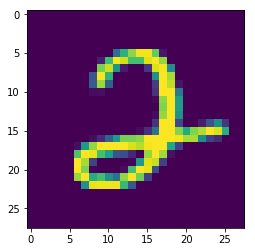

In [10]:
i = 2
plt.imshow(X72[i].reshape([28, 28]))
Y72[i]

#### logit trained without l1 regularization - mask #1

In [11]:
logit = sklearn.linear_model.LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1000.0, fit_intercept=True, 
                                                intercept_scaling=1, class_weight=None, random_state=1998, 
                                                solver='newton-cg', max_iter=100, multi_class='auto', 
                                                verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
logit.fit(X_train, Y_train)
print(logit.score(X_train, Y_train))
print(logit.score(X_test, Y_test))

d:\utilites\programming\anaconda-python\lib\site-packages\sklearn\linear_model\_logistic.py:1503: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


1.0
0.9794175301036124


In [12]:
logit.sparsify()
display(logit.coef_)
print(logit.coef_)

<1x784 sparse matrix of type '<class 'numpy.float64'>'
	with 661 stored elements in Compressed Sparse Row format>

  (0, 33)	-4.086650458196093e-05
  (0, 34)	-0.0002538025021405993
  (0, 35)	-0.00016992823599977462
  (0, 36)	-0.00025067453408156613
  (0, 37)	-0.00015502998274499573
  (0, 38)	-6.428345604048938e-07
  (0, 39)	-1.7608179639069048e-06
  (0, 40)	-8.860275559185518e-07
  (0, 41)	-4.4634630423290167e-07
  (0, 42)	-7.4903226726363955e-06
  (0, 43)	-2.261791607462397e-05
  (0, 44)	-0.001137828520067133
  (0, 45)	-0.00044073772918390593
  (0, 46)	-1.2877375072222117e-07
  (0, 61)	-5.3771716555211736e-05
  (0, 62)	-0.00026199681325189873
  (0, 63)	-0.00015691374803152245
  (0, 64)	-7.965070917013859e-05
  (0, 65)	-0.00040041830023939605
  (0, 66)	-0.0010385529063938977
  (0, 67)	-0.0007570368298380863
  (0, 68)	-0.0004768012446282294
  (0, 69)	-0.0003517914149263093
  (0, 70)	-0.00010541087464834135
  (0, 71)	-6.235621385517582e-05
  :	:
  (0, 747)	0.031401446726662376
  (0, 748)	0.013933400834161612
  (0, 749)	0.018339415882557115
  (0, 750)	0.013837402008542497
  (0, 751)	0.0120554900448474

In [13]:
mask1 = abs(logit.coef_.toarray())[0]

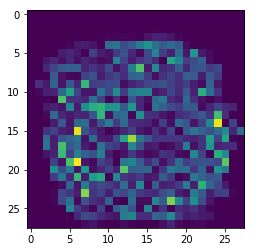

In [14]:
plt.imshow(mask1.reshape(28, 28))

In [15]:
logit = sklearn.linear_model.LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=0.001, fit_intercept=True, 
                                                intercept_scaling=1, class_weight=None, random_state=1998, 
                                                solver='liblinear', max_iter=100, multi_class='auto', 
                                                verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
logit.fit(X_train, Y_train)
print(logit.score(X_train, Y_train))
print(logit.score(X_test, Y_test))

0.9894972692900154
0.983197983758051


In [16]:
logit.sparsify()
display(logit.coef_)
print(logit.coef_)

<1x784 sparse matrix of type '<class 'numpy.float64'>'
	with 125 stored elements in Compressed Sparse Row format>

  (0, 124)	-0.0004609225129709846
  (0, 125)	-0.0011410787012579226
  (0, 127)	-0.0008629466613964504
  (0, 151)	-0.0016326920145319443
  (0, 153)	-0.004730573094733869
  (0, 155)	-0.0016554013652352513
  (0, 156)	-0.004904461944244076
  (0, 157)	-0.0005994127017001093
  (0, 158)	-0.0022206567205281047
  (0, 177)	-0.00031105722373018976
  (0, 179)	-8.109695498368158e-05
  (0, 182)	-0.00025099225681264603
  (0, 204)	-1.9400912458063043e-05
  (0, 212)	5.807698652049483e-05
  (0, 213)	3.500409232297975e-05
  (0, 215)	0.0024336546830459787
  (0, 233)	0.001651706906365168
  (0, 236)	0.0007549115379200832
  (0, 240)	0.0020723769795931092
  (0, 241)	0.0009731748764411786
  (0, 242)	0.00174403639575586
  (0, 243)	8.785900706710383e-05
  (0, 244)	0.00034997345288412056
  (0, 261)	0.0008731711588727942
  (0, 264)	0.0006646807465142527
  :	:
  (0, 597)	-0.004538805624724373
  (0, 598)	-0.0008299261361379271
  (0, 599)	-0.0018720854255912297
  (0, 601)	-0.0003646276890754778
  (0, 607)	-0.00124876

In [17]:
mask2 = abs(logit.coef_.toarray())[0]

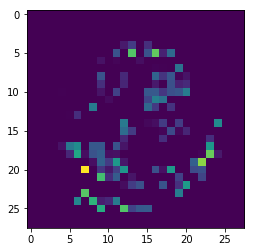

In [138]:
plt.imshow(mask2.reshape(28, 28))

In [18]:
indm2 = np.array(np.nonzero(mask2))
indm2.size

125

In [19]:
small_x_train = np.zeros([len(X_train), indm2.size])
for i in range(len(X_train)):
    small_x_train[i] = X_train[i][indm2].reshape(-1)
    
small_x_test = np.zeros([len(X_test), indm2.size])
for i in range(len(X_test)):
    small_x_test[i] = X_test[i][indm2].reshape(-1)

In [20]:
logit = sklearn.linear_model.LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1000.0, fit_intercept=True, 
                                                intercept_scaling=1, class_weight=None, random_state=1998, 
                                                solver='newton-cg', max_iter=100, multi_class='auto', 
                                                verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
logit.fit(small_x_train, Y_train)

print(logit.score(small_x_train, Y_train))
print(logit.score(small_x_test, Y_test))

d:\utilites\programming\anaconda-python\lib\site-packages\sklearn\linear_model\_logistic.py:1503: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


0.9915978154320123
0.9784374124894988


In [21]:
logit = sklearn.linear_model.LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=0.001, fit_intercept=True, 
                                                intercept_scaling=1, class_weight=None, random_state=1998, 
                                                solver='liblinear', max_iter=100, multi_class='auto', 
                                                verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
logit.fit(small_x_train, Y_train)
print(logit.score(small_x_train, Y_train))
print(logit.score(small_x_test, Y_test))

0.989357232880549
0.9827779333520023


In [2]:
1+1

2